In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os

In [18]:
logflist = os.listdir("log")
tmpflist = []
for x in logflist:
    if x.startswith('NEW1_8VE_4800_19200_150_'):
        print(x)
        tmpflist.append(x)

NEW1_8VE_4800_19200_150_64MPI_1OMP.a2_20B.676598.log
NEW1_8VE_4800_19200_150_16MPI_4OMP.a2_20B.676600.log
NEW1_8VE_4800_19200_150_8MPI_8OMP.a2_20B.676601.log
NEW1_8VE_4800_19200_150_32MPI_2OMP.a2_20B.676599.log


In [19]:
klist = ['8MPI_8OMP', '16MPI_4OMP','32MPI_2OMP','64MPI_1OMP']
tmpflist[0][24:33]

'64MPI_1OM'

In [33]:

datamap = {}
for x in tmpflist:
    for k in klist:
        if k in x:
            break
    datamap[k] = {}
    print(k)
    f= open('log/'+x, 'r')
    while 1:
        line = f.readline()
        if not line:
            break
        if line.startswith('Time'):
            timedata = f.readline().split(' ')
            timedata = [float(x) for x in timedata]
        if line.startswith("BW"):
            bddata = f.readline().split(' ')
            bddata = [float(x) for x in bddata]
    datamap[k]['Time'] = timedata
    datamap[k]['Bandwidth'] = bddata


64MPI_1OMP
16MPI_4OMP
8MPI_8OMP
32MPI_2OMP


In [86]:

for idx,tmpf in enumerate(tmpflist):
    fig,ax=plt.subplots()
    ax.set_facecolor('lightgrey')
    ax.set_alpha(0.0001)
    timedata = np.array(datamap[klist[idx]]['Time']) * 1000000
    std = np.std(timedata)
    print(std)
    plt.plot(timedata,label='8VE {} Time '.format(klist[idx]))
    plt.ylabel('Time (micro seconds)')
    plt.xlabel('Nruns')
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    plt.legend(fontsize=8)
    ymax = np.array(timedata).max()
    ymin = np.array(timedata).min()
    plt.ylim([ymin*0.2,ymax*2])
    plt.minorticks_on()
    plt.grid(which='both', color='white', linewidth='0.3')
    plt.title("8VE 5000 runs std: {:.4e}".format(std))
    plt.savefig('plots/traces/{}.eps'.format('time_8VE_'+klist[idx]),bbox_inches='tight')
    plt.close()

0.7807950425662296


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


3.5998212515618033


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


2.916420970984812


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


3.5939973382154866


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


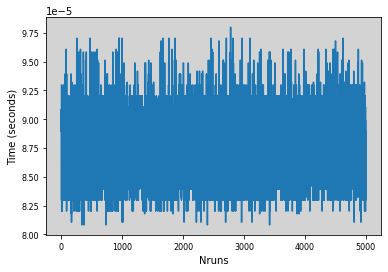

In [74]:
fig,ax=plt.subplots()
ax.set_facecolor('lightgrey')
ax.set_alpha(0.0001)
plt.plot(datamap[klist[idx]]['Time'])
plt.ylabel('Time (seconds)')
plt.xlabel('Nruns')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.savefig('plots/traces/{}.pdf'.format('time_8VE_'+klist[idx]),bbox_inches='tight')

In [25]:
datamap.keys()

dict_keys(['64MPI_1OMP', '16MPI_4OMP', '8MPI_8OMP', '32MPI_2OMP'])

In [104]:
tmpflist

['NEW1_8VE_4800_19200_150_64MPI_1OMP.a2_20B.676598.log',
 'NEW1_8VE_4800_19200_150_16MPI_4OMP.a2_20B.676600.log',
 'NEW1_8VE_4800_19200_150_8MPI_8OMP.a2_20B.676601.log',
 'NEW1_8VE_4800_19200_150_32MPI_2OMP.a2_20B.676599.log']

In [105]:
xlims=[[1800,2400],[1500,2500],[1800,2400],[1500,2500]]

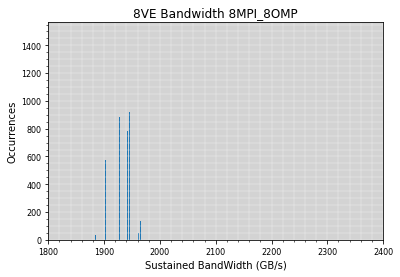

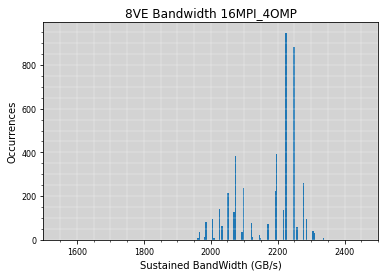

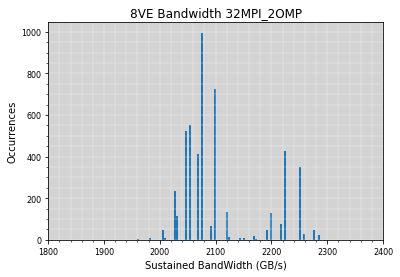

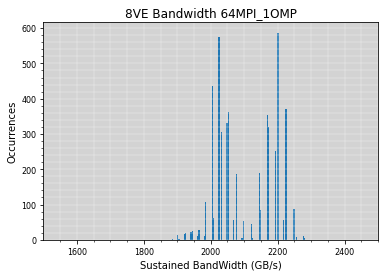

In [106]:
for idx,tmpf in enumerate(tmpflist):
    fig,ax=plt.subplots()
    ax.set_facecolor('lightgrey')
    ax.set_alpha(0.0001)
    bddata = np.array(datamap[klist[idx]]['Bandwidth'])
    plt.hist(bddata,bins=100)
    plt.ylabel('Occurrences')
    plt.xlabel('Sustained BandWidth (GB/s)')
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    xmax = np.array(bddata).max()
    xmin = np.array(bddata).min()
#     plt.xlim([xmin*0.6,xmax*1.4])
    plt.xlim(xlims[idx])
    plt.minorticks_on()
    plt.title('8VE Bandwidth {}'.format(klist[idx]))
    plt.grid(which='both', color='white', linewidth='0.3')
    plt.savefig('plots/traces/{}.eps'.format('bandwidth_8VE_'+klist[idx]),bbox_inches='tight')